In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Reading the data
data = pd.read_csv('./fitness_analysis.csv')

# Renaming Column Names
data.columns = [
    'Timestamp', 'Name', 'Gender', 'Age', 'Importance_of_Exercise', 'Fitness_Level', 
    'Exercise_Frequency', 'Barriers_to_Exercise', 'Exercise_Forms', 'Exercise_Company', 
    'Exercise_Time', 'Exercise_Length', 'Healthy_Eater', 'Healthy_Eater_Challange',
    'Health_Score', 'Has_Recommended_Friends', 'Has_Bought_Equipment', 'Motivation_to_Exercise'
]

filtered_data = data[(data['Gender'] == 'Male') & (data['Age'] == '19 to 25')]

# Display the first few rows of the dataframe
filtered_data.head()

,Timestamp,Name,Gender,Age,Importance_of_Exercise,Fitness_Level,Exercise_Frequency,Barriers_to_Exercise,Exercise_Forms,Exercise_Company,Exercise_Time,Exercise_Length,Healthy_Eater,Healthy_Eater_Challange,Health_Score,Has_Recommended_Friends,Has_Bought_Equipment,Motivation_to_Exercise
8,2019/07/04 8:06:17 AM GMT+5:30,Bupesh R,Male,19 to 25,5,Unfit,3 to 4 times a week,I don't have enough time;I can't stay motivate...,Gym;Team sport,With a friend,Evening,1 hour,No,Temptation and cravings,2,Yes,No,I want to be fit;I want to increase muscle mas...
11,2019/07/04 8:11:42 AM GMT+5:30,Ashwin,Male,19 to 25,5,Unfit,3 to 4 times a week,I don't have enough time,Walking or jogging,Alone,Early morning,2 hours,No,Temptation and cravings,4,Yes,Yes,I want to be fit;I want to increase muscle mas...
14,2019/07/04 8:19:03 AM GMT+5:30,Hari Vishwa,Male,19 to 25,5,Average,1 to 2 times a week,I don't have enough time;I'll become too tired...,Walking or jogging,Alone,Evening,30 minutes,No,Ease of access to fast food;Temptation and cra...,3,Yes,Yes,I want to be fit;I want to increase muscle mas...
18,2019/07/04 8:28:19 AM GMT+5:30,Pranesh s,Male,19 to 25,3,Unfit,Never,I don't have enough time;I can't stay motivate...,Walking or jogging,Alone,Early morning,1 hour,Not always,Temptation and cravings,1,No,Yes,I want to be fit;I want to increase muscle mas...
20,2019/07/04 8:30:14 AM GMT+5:30,Mukund,Male,19 to 25,4,Average,2 to 3 times a week,I don't have enough time;I'll become too tired,Walking or jogging;Gym,Alone,Early morning,30 minutes,Not always,Cost;Ease of access to fast food,2,No,No,I want to be fit;I want to lose weight


C:\Users\timom\AppData\Local\Temp\ipykernel_23400\2033324174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Exercise_Frequency'] = pd.Categorical(filtered_data['Exercise_Frequency'], categories=exercise_frequency_order, ordered=True)


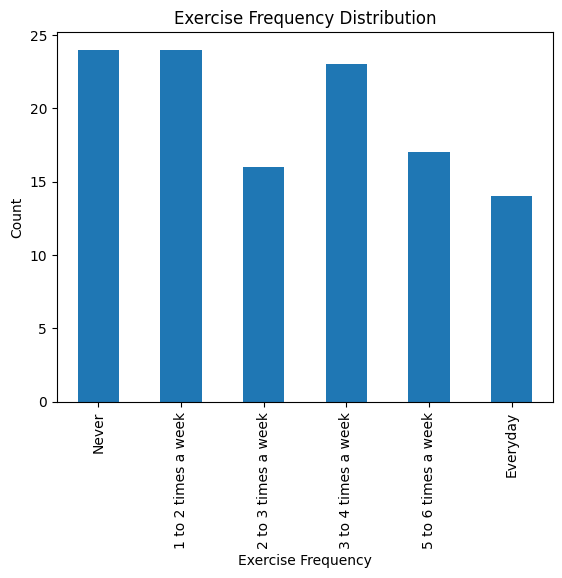

In [55]:
# Define the desired order for exercise frequency categories
exercise_frequency_order = [
    'Never', '1 to 2 times a week', '2 to 3 times a week', '3 to 4 times a week', '5 to 6 times a week', 'Everyday'
]
# Create a categorical variable with the desired order
filtered_data['Exercise_Frequency'] = pd.Categorical(filtered_data['Exercise_Frequency'], categories=exercise_frequency_order, ordered=True)

# Sort the values in this order and then count
exercise_frequency_counts = filtered_data['Exercise_Frequency'].value_counts().sort_index()

# Create the bar plot
exercise_frequency_counts.plot(kind='bar', title='Exercise Frequency Distribution')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')
plt.show()

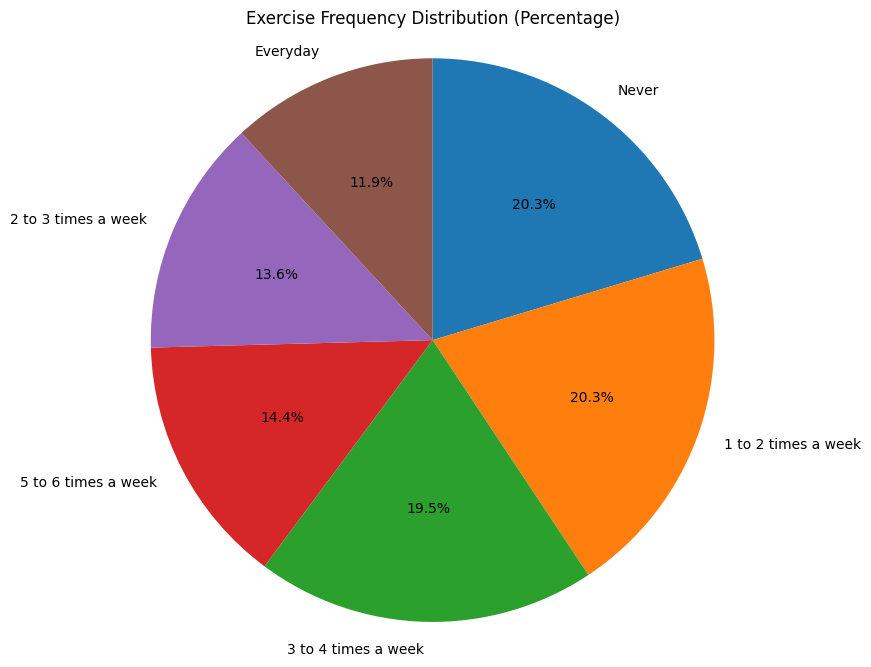

In [56]:
# Calculate the percentage distribution of exercise frequency
exercise_frequency_percentages = (exercise_frequency_counts / exercise_frequency_counts.sum()) * 100

# Sort the values in descending order to start with the largest piece
exercise_frequency_percentages = exercise_frequency_percentages.sort_values(ascending=False)

# Create a pie chart to display the percentage distribution
plt.figure(figsize=(8, 8))
plt.pie(exercise_frequency_percentages, labels=exercise_frequency_percentages.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Exercise Frequency Distribution (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

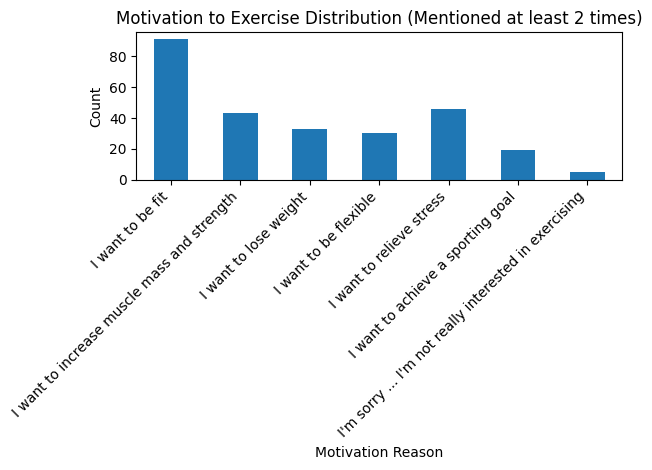

In [57]:
from collections import Counter
# Split the entries based on the semicolon delimiter and then flatten the list
motivation_reasons = filtered_data['Motivation_to_Exercise'].str.split(';')
flattened_motivation_reasons = [reason.strip() for sublist in motivation_reasons for reason in sublist]

# Count the occurrences of each motivation
motivation_counts = Counter(flattened_motivation_reasons)

# Convert the Counter object to a dictionary and then to a pandas Series
motivation_counts_series = pd.Series(dict(motivation_counts))

# Filter out motivations mentioned fewer than 2 times
filtered_motivation_counts = motivation_counts_series[motivation_counts_series >= 2]

# Plot the distribution of these reasons as a bar chart
filtered_motivation_counts.plot(kind='bar', title='Motivation to Exercise Distribution (Mentioned at least 2 times)')
plt.xlabel('Motivation Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # To make sure the labels don't get cut off
plt.show()


C:\Users\timom\AppData\Local\Temp\ipykernel_23400\1869876520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Exercise_Frequency'] = filtered_data['Exercise_Frequency'].astype(exercise_frequency_cat_type)
C:\Users\timom\AppData\Local\Temp\ipykernel_23400\1869876520.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Fitness_Level'] = filtered_data['Fitness_Level'].astype(fitness_level_cat_type)


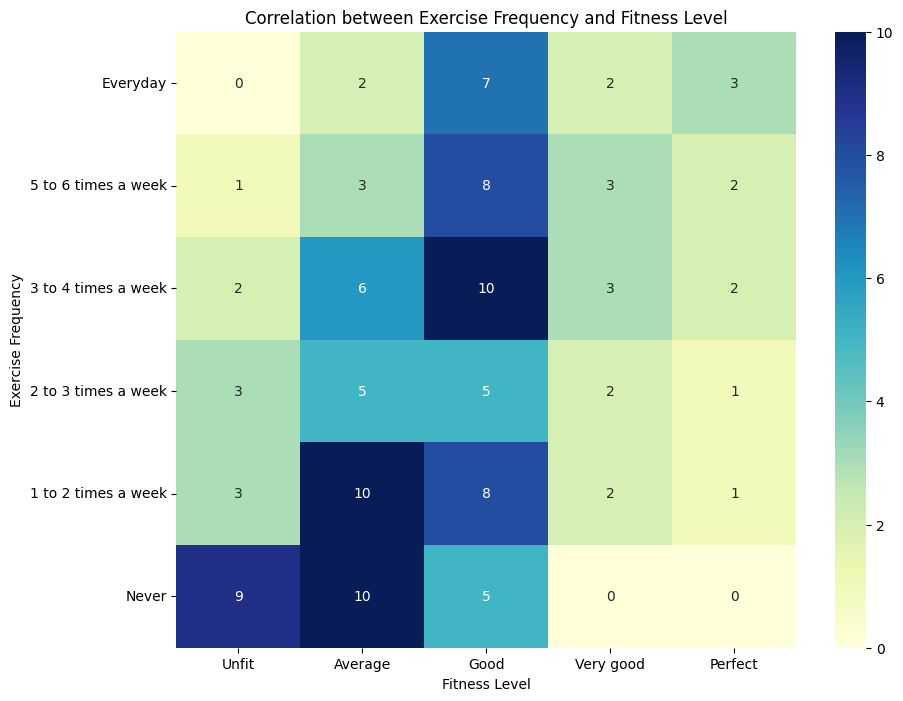

In [58]:
from pandas.api.types import CategoricalDtype

# Define the order for 'How often do you exercise?' and 'How do you describe your current level of fitness ?'
exercise_frequency_order = [
    'Everyday',
    '5 to 6 times a week',
    '3 to 4 times a week', 
    '2 to 3 times a week',
    '1 to 2 times a week', 
    'Never'
]

fitness_level_order = [
    'Unfit', 
    'Average', 
    'Good', 
    'Very good', 
    'Perfect'
]

# Convert 'How often do you exercise?' and 'How do you describe your current level of fitness ?' 
# into ordered categorical types
exercise_frequency_cat_type = CategoricalDtype(categories=exercise_frequency_order, ordered=True)
fitness_level_cat_type = CategoricalDtype(categories=fitness_level_order, ordered=True)

filtered_data['Exercise_Frequency'] = filtered_data['Exercise_Frequency'].astype(exercise_frequency_cat_type)
filtered_data['Fitness_Level'] = filtered_data['Fitness_Level'].astype(fitness_level_cat_type)

# Check if the conversion was successful
(filtered_data['Exercise_Frequency'].dtype, filtered_data['Fitness_Level'].dtype)

# Create a pivot table with 'How often do you exercise?' as rows and 
# 'How do you describe your current level of fitness ?' as columns
pivot_table = pd.pivot_table(
    filtered_data, 
    values='Timestamp', # Can be any column, since we're just counting occurrences
    index='Exercise_Frequency', 
    columns='Fitness_Level', 
    aggfunc=np.size, # Count the number of occurrences
    fill_value=0 # Fill missing values with 0
)

# Generate a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Correlation between Exercise Frequency and Fitness Level')
plt.ylabel('Exercise Frequency')
plt.xlabel('Fitness Level')
plt.show()


In [59]:
from sklearn.preprocessing import LabelEncoder

# Dropping irrelevant columns
features = filtered_data.drop(['Timestamp', 'Name', 'Exercise_Company', 'Has_Recommended_Friends', 'Motivation_to_Exercise', 'Exercise_Time', 'Exercise_Length', 'Exercise_Frequency'], axis=1)

# Label encoding for categorical variables
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

fitness_level_order = {'Unfit': 0, 'Average': 1, 'Good': 2, 'Very good': 3, 'Perfect': 4}
features['Fitness_Level'] = features['Fitness_Level'].map(fitness_level_order)

# Also encode the target variables
targets = ['Exercise_Time', 'Exercise_Length', 'Exercise_Frequency']
encoded_targets = filtered_data[targets].apply(LabelEncoder().fit_transform)

# Display the first few rows of the processed features and targets
display(features.head())
encoded_targets.head()

,Gender,Age,Importance_of_Exercise,Fitness_Level,Barriers_to_Exercise,Exercise_Forms,Healthy_Eater,Healthy_Eater_Challange,Health_Score,Has_Bought_Equipment
8,0,0,5,0,10,5,0,11,2,0
11,0,0,5,0,5,12,0,11,4,1
14,0,0,5,1,17,12,0,4,3,1
18,0,0,3,0,12,12,1,11,1,1
20,0,0,4,1,15,13,1,2,2,0


,Exercise_Time,Exercise_Length,Exercise_Frequency
8,2,0,2
11,1,1,2
14,2,3,0
18,1,0,5
20,1,3,1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import numpy as np

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_targets, test_size=0.2, random_state=42)

results = {}
for target in encoded_targets.columns:
    # Selecting the target column
    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Training a k-Nearest Neighbors regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=5)
    knn_regressor.fit(X_train, y_train_target)

    # Making predictions
    y_pred = knn_regressor.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test_target, y_pred)
    r2 = r2_score(y_test_target, y_pred)

    # Storing results
    # class_report = classification_report(y_test, y_pred)
    # print("Classification Report:")
    # print(class_report)
    results[target] = {'Mean Squared Error': mse, 'R-squared': r2}

results

{'Exercise_Time': {'Mean Squared Error': 0.375,
  'R-squared': -0.2272727272727273},
 'Exercise_Length': {'Mean Squared Error': 2.4066666666666667,
  'R-squared': -0.03219657483246463},
 'Exercise_Frequency': {'Mean Squared Error': 4.366666666666667,
  'R-squared': -0.2098124098124099}}

1RM